In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Задача: построить производственную функцию Кобба-Дугласа по историческим данным об экономике США в период 1936-1950.**

In [22]:
df = pd.read_excel('data_task_1.xlsx')
df.columns = ['year','Y', 'K', 'L']
df

,year,Y,K,L
0,1936,83278,234236,73426
1,1937,90884,254890,77568
2,1938,83743,217606,70460
3,1939,91530,221746,75131
4,1940,101313,228757,79694
5,1941,116415,250238,89276
6,1942,127434,266469,97056
7,1943,136274,266154,101633
8,1944,146470,269520,100124
9,1945,145052,263098,94920


Описание датасета: 
   1. период для анализа - 1936-1950 гг.
   2. Y - ВВП(млн долл.)
   3. K(млн долл.)
   4. L(тыс.чел.)

$$Y = A * K^α * L^β $$

In [3]:
# Добавим в исходную таблицу новые столбцы, необходимые для формирования матриц для последующих вычислений

# Элементы, которые будет содержать матрица коэффициентов системы B:
df['ln_Ki'] = np.log(df['K'])
df['ln_Li'] = np.log(df['L'])
df['ln^2_Ki'] = df['ln_Ki'] ** 2
df['ln^2_Li'] = df['ln_Li'] ** 2
df['ln_Ki_ln_Li'] = df['ln_Ki'] * df['ln_Li']

# Элементы, которые будет содержать вектор Z
df['ln_Yi'] = np.log(df['Y'])
df['ln_Ki_ln_Yi'] = df['ln_Ki'] * df['ln_Yi']
df['ln_Yi_ln_Li'] = df['ln_Yi'] * df['ln_Li']

df.loc['Total']= df.sum()
df

,year,Y,K,L,ln_Ki,ln_Li,ln^2_Ki,ln^2_Li,ln_Ki_ln_Li,ln_Yi,ln_Ki_ln_Yi,ln_Yi_ln_Li
0,1936.0,83278.0,234236.0,73426.0,12.364084,11.204033,152.870584,125.530364,138.527615,11.329940,140.084331,126.941022
1,1937.0,90884.0,254890.0,77568.0,12.448587,11.258910,154.967327,126.763060,140.157528,11.417339,142.129745,128.546798
2,1938.0,83743.0,217606.0,70460.0,12.290441,11.162800,151.054949,124.608114,137.195744,11.335508,139.318395,126.536012
3,1939.0,91530.0,221746.0,75131.0,12.309288,11.226989,151.518568,126.045272,138.196234,11.424422,140.626500,128.261856
4,1940.0,101313.0,228757.0,79694.0,12.340416,11.285950,152.285857,127.372658,139.273308,11.525970,142.235260,130.081516
5,1941.0,116415.0,250238.0,89276.0,12.430168,11.399488,154.509070,129.948326,141.697548,11.664917,144.996871,132.974077
6,1942.0,127434.0,266469.0,97056.0,12.493013,11.483043,156.075379,131.860286,143.457813,11.755354,146.859791,134.987239
7,1943.0,136274.0,266154.0,101633.0,12.491830,11.529124,156.045826,132.920690,144.019856,11.822423,147.683701,136.302174
8,1944.0,146470.0,269520.0,100124.0,12.504398,11.514165,156.359966,132.575989,143.977697,11.894576,148.734510,136.956106
9,1945.0,145052.0,263098.0,94920.0,12.480282,11.460790,155.757435,131.349701,143.033886,11.884848,148.326248,136.209739


In [4]:
M = df.shape[0] - 1
ln_Ki = df.loc['Total', 'ln_Ki']
ln_Li = df.loc['Total', 'ln_Li']

ln_2_Ki = df.loc['Total', 'ln^2_Ki']
ln_2_Li = df.loc['Total', 'ln^2_Li']
ln_Ki_ln_Li = df.loc['Total', 'ln_Ki_ln_Li']

ln_Yi = df.loc['Total', 'ln_Yi']
ln_Ki_ln_Yi = df.loc['Total', 'ln_Ki_ln_Yi']
ln_Yi_ln_Li = df.loc['Total', 'ln_Yi_ln_Li']

In [5]:
B_matrix = np.matrix([[M, ln_Ki, ln_Li],[ln_Ki,ln_2_Ki,ln_Ki_ln_Li],[ln_Li,ln_Ki_ln_Li,ln_2_Li]])
B_matrix

matrix([[  15.        ,  186.80328398,  171.04056293],
        [ 186.80328398, 2326.49263612, 2130.21625543],
        [ 171.04056293, 2130.21625543, 1950.5776556 ]])

In [6]:
B_matrix_inv = np.linalg.inv(B_matrix)
B_matrix_inv

matrix([[1391.73370365, -158.90775301,   51.50523599],
        [-158.90775301,   28.7879861 ,  -17.50505258],
        [  51.50523599,  -17.50505258,   14.60134792]])

In [7]:
Z_vector = np.array([[ln_Yi, ln_Ki_ln_Yi,ln_Yi_ln_Li]]).reshape(-1,1)
Z_vector

array([[ 175.59249546],
       [2187.02393259],
       [2002.65879501]])

In [8]:
C_vector = B_matrix_inv * Z_vector
C_vector

matrix([[-9.65103581],
        [ 0.35816629],
        [ 1.48182038]])

In [9]:
solution = np.array([np.exp(C_vector[0]),C_vector[1], C_vector[2]])
solution

array([[[6.43588692e-05]],

       [[3.58166295e-01]],

       [[1.48182038e+00]]])

In [10]:
A = solution[0][0][0]
α = solution[1][0][0]
β = solution[2][0][0]

In [11]:
A, α, β

(6.435886924849992e-05, 0.35816629464534344, 1.4818203831309802)

In [12]:
Y_estimated= A*df['K']**α*df['L']**β
Y_estimated = Y_estimated[:-1]
Y_historical = df['Y'][:-1]

In [13]:
df_1 = pd.DataFrame([df['year'][:-1],Y_historical,Y_estimated])
df_1 = df_1.transpose()
df_1.columns = ['year','Y_historical','Y_estimated']
df_1

,year,Y_historical,Y_estimated
0,1936.0,83278.0,87529.182563
1,1937.0,90884.0,97861.775005
2,1938.0,83743.0,80197.793523
3,1939.0,91530.0,88797.757130
4,1940.0,101313.0,97991.424523
5,1941.0,116415.0,119733.647937
6,1942.0,127434.0,138600.119124
7,1943.0,136274.0,148331.822719
8,1944.0,146470.0,145734.534974
9,1945.0,145052.0,133494.066020


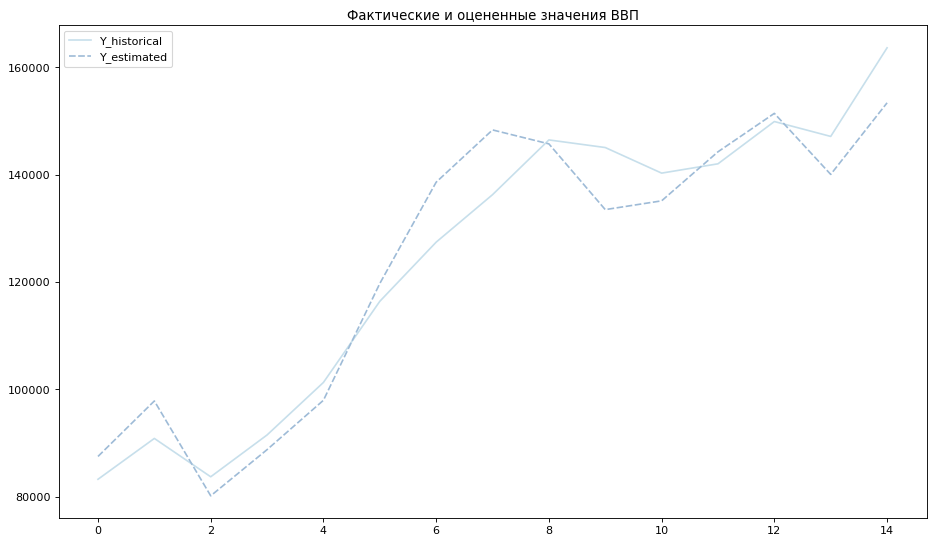

In [24]:
plt.figure(figsize=(14, 8), dpi=80);
sns.set_palette(sns.color_palette("ch:s=.25,rot=-.25"));
sns.lineplot(data = df_1[['Y_historical','Y_estimated']]);
plt.title('Фактические и оцененные значения ВВП');

**Вывод:**
    полученная функция довольно хорошо аппроксимирует данные

In [ ]:
df['C'] = 
L_isoq = 